

# Project: Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Description**: in this project, we will be analyzing data associated with soccer matches.this data contains +25,000 matches , +10,000 players, Seasons 2008 to 2016  and 11 European Countries with their lead championship and Team line up with squad formation (X, Y coordinates) and more...
 
>
> **Questions**:
### Q1:- Which players had the most penalties ? ###

###  Question 2 :- what The most preferred foot ? 

### Q3:- what is the  relation between number of goals scored when teams are playing in their home  ground?

### Q4:- Which league has most number of goals scored?
  
### Q5:- what is the biggest matches that were played in  season ?


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import seaborn as sns # to make the visualise look better 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# read our file in pandas useing read_csv
df_Country=pd.read_csv('./soccer_DataSet/Country.csv')
df_League=pd.read_csv('./soccer_DataSet/League.csv')
df_Match=pd.read_csv('./soccer_DataSet/Match.csv')
df_Player=pd.read_csv('./soccer_DataSet/Player.csv')
df_Player_Attributes=pd.read_csv('./soccer_DataSet/Player_Attributes.csv')
df_sqlite_sequence=pd.read_csv('./soccer_DataSet/sqlite_sequence.csv')
df_Team=pd.read_csv('./soccer_DataSet/Team.csv')
df_Team_Attributes=pd.read_csv('./soccer_DataSet/Team_Attributes.csv')

 # the steps I took in my process in order to assess and clean  data 
 
 > **Description:-**
 
 1- I've checked missing values in df_Country
and duplicated value. 

2-  I've checked missing values in df_league
and duplicated value.

3- I merged df_country and df_league in a new DataFrame called df_countries_leagues 
then I dropped some columns  that I won't need 

4- I've checked the shape of df_Match and dropped the columns with index(10) using enumerate function to get the index of each row

5- I merged  df_Match  and df_countries_leagues  in a new Dataframe called match_countries_league contains (season and data, home_goal, and so more )

6-I've checked missing values in match_countries_league 
and duplicated value and unique values

7- I created a function in order to create the result column that contains the result of each match based on home_goals or away_goals

then I added this column to match_countries_league 

8- I've made some statistics to get a general idea

9- I've created a number of matches in each season using pandas.agg listed them with index and values then created a new Data frame containing 'season' and matches columns  then
check null and massing  and duplicated values 

10- I merged df_player and df_Player_Attributes in a new Dataframe called full_player and dropped some columns that duplicated when I was trying to merge them  and renamed some columns and dropped rows with NUll to match all rows  then filled some rows with mean of them 

checked null value and duplicated in  df_Team_Attributes and team_attribure,  and dropped column called buildUpPlayDribbling we will not need it.

In [3]:
#show country
df_Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
#shape of the data 
#Check data type  of columns
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [5]:
#Check Missing  values
df_Country.isnull().sum().sum() 

0

In [6]:
#Check duplicate  values
df_Country.duplicated().sum()

0

In [7]:
#Check Missing  values
df_League.isnull().sum().sum()

0

In [8]:
#Check duplicate  values
df_League.duplicated().sum()

0

In [9]:
#shape of the data 
#Check data type  of columns
df_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [10]:
df_Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [11]:
#merge df_country and df_league
df_countries_leagues=df_Country.merge(df_League, left_on='id', right_on='id',how='outer')
#drop id form df_countries_leagues
df_countries_leagues.drop('id', axis=1, inplace=True)
#rename name_x with country and name_y with league
df_countries_leagues.rename(columns={'name_x':'country','name_y':'league'},inplace=True)
df_countries_leagues

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


In [12]:
df_Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [13]:
# get the shape of the df_match
df_Match.shape

(25979, 115)

In [14]:
# let's get only columns we will need
for i,letter in enumerate(df_Match.columns):
    if i > 10:
        df_Match.drop(letter,axis=1, inplace=True)
#show our result 
df_Match['away_team_goal'][1729]

0

In [15]:
# get some info about df_match
df_Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [16]:
#let's merge df_Match data with df_countries_league
match_countries_league=df_Match.merge(df_countries_leagues, left_on='country_id', right_on='country_id', how='outer')

In [17]:
match_countries_league.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


In [18]:
# get some information about new  shape 
match_countries_league.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
 11  country           25979 non-null  object
 12  league            25979 non-null  object
dtypes: int64(9), object(4)
memory usage: 2.8+ MB


In [19]:
#check null value
match_countries_league.isnull().sum().sum()

0

In [20]:
#check unique value
match_countries_league.nunique()

id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

In [21]:
match_countries_league.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


### create a function to Avoid repetition

In [22]:
# this will take two parameters home goal,away goal and return the result of the match 
# based on the the number of goals scored by away_team_goal, home_team_goal

def match_result(home_goals,away_goals):
    if(home_goals > away_goals):
        return 'Home'
    elif(away_goals > home_goals):
        return 'Away'
    else:
        return 'Draw'

# test our function
print(match_result(3,2))

Home


### add new result colunm 

In [23]:
match_countries_league['result']=match_countries_league.apply(lambda x: match_result(x['home_team_goal'],x['away_team_goal']), axis=1)
match_countries_league.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,result
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,Draw
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,Draw
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,Away
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,Home
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,Away


In [24]:
# Generates descriptive statistics, excluding NaN values
match_countries_league.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000


In [25]:
match_countries_league.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
 11  country           25979 non-null  object
 12  league            25979 non-null  object
 13  result            25979 non-null  object
dtypes: int64(9), object(5)
memory usage: 3.0+ MB


In [29]:
# reorder the seasons 
match_seasons=match_countries_league.groupby('season').id.agg(matches='count')

# get the date of seasons
match_index=match_seasons.index
match_index=list(match_index)

#get the number of matches in each  sesson 
matches_num=match_seasons.values
matches_num=list(matches_num)
new_match_num=[]
for i in matches_num:
    for x in i:
        print(x)
    new_match_num.append(x)
     

3326
3230
3260
3220
3260
3032
3325
3326


In [30]:
# we need to create a new data frame   for each season and number of matches
data={'season':match_index,
      'matches':new_match_num
     }
matches_season=pd.DataFrame(data)

In [31]:
matches_season

,season,matches
0,2008/2009,3326
1,2009/2010,3230
2,2010/2011,3260
3,2011/2012,3220
4,2012/2013,3260
5,2013/2014,3032
6,2014/2015,3325
7,2015/2016,3326


In [32]:
#check for null value
matches_season.isnull().sum().sum()

0

In [33]:
#check for duplicated value 
matches_season.duplicated().sum()

0

In [34]:
#show player 
df_Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [35]:
#show attribute of player
df_Player_Attributes.head()
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [36]:
# merge player with player_attribute
full_player=df_Player_Attributes.merge(df_Player,left_on='id',right_on='id',how='outer')

In [37]:
# drop some duplicated columns from full_player
for i in full_player.columns:
    if i[-1] == 'x':
        full_player.drop(i ,axis=1 ,inplace=True)
    if i[-2] == '_':
        # rename colume delate the letter _y 
        full_player.rename(columns={f'{i}':'player_api_id'},inplace=True)
        full_player.rename(columns={f'{i}':'player_fifa_api_id'},inplace=True)
      
    
full_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   date                 183978 non-null  object 
 2   overall_rating       183142 non-null  float64
 3   potential            183142 non-null  float64
 4   preferred_foot       183142 non-null  object 
 5   attacking_work_rate  180748 non-null  object 
 6   defensive_work_rate  183142 non-null  object 
 7   crossing             183142 non-null  float64
 8   finishing            183142 non-null  float64
 9   heading_accuracy     183142 non-null  float64
 10  short_passing        183142 non-null  float64
 11  volleys              181265 non-null  float64
 12  dribbling            183142 non-null  float64
 13  curve                181265 non-null  float64
 14  free_kick_accuracy   183142 non-null  float64
 15  long_passing     

In [38]:
#check null value
full_player.isnull().sum()

id                          0
date                        0
overall_rating            836
potential                 836
preferred_foot            836
attacking_work_rate      3230
defensive_work_rate       836
crossing                  836
finishing                 836
heading_accuracy          836
short_passing             836
volleys                  2713
dribbling                 836
curve                    2713
free_kick_accuracy        836
long_passing              836
ball_control              836
acceleration              836
sprint_speed              836
agility                  2713
reactions                 836
balance                  2713
shot_power                836
jumping                  2713
stamina                   836
strength                  836
long_shots                836
aggression                836
interceptions             836
positioning               836
vision                   2713
penalties                 836
marking                   836
standing_t

In [39]:
# drop row from 11075 to 183978   
#player only has  about 11075 rows and player_attributes only has about 183978 
full_player.drop(full_player.index[11075:183978], axis=0, inplace=True)

In [40]:
#check the shape 
full_player.shape

(11075, 46)

In [41]:
#fill null value 
full_player.fillna(full_player.mean(), inplace=True)

C:\Users\3G\AppData\Local\Temp/ipykernel_23980/3206737283.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full_player.fillna(full_player.mean(), inplace=True)


In [42]:
# drop the other null_value
full_player.dropna(inplace=True)

In [43]:
#check null value 
full_player.isnull().sum().sum()

0

In [44]:
full_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10897 entries, 0 to 11074
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10897 non-null  int64  
 1   date                 10897 non-null  object 
 2   overall_rating       10897 non-null  float64
 3   potential            10897 non-null  float64
 4   preferred_foot       10897 non-null  object 
 5   attacking_work_rate  10897 non-null  object 
 6   defensive_work_rate  10897 non-null  object 
 7   crossing             10897 non-null  float64
 8   finishing            10897 non-null  float64
 9   heading_accuracy     10897 non-null  float64
 10  short_passing        10897 non-null  float64
 11  volleys              10897 non-null  float64
 12  dribbling            10897 non-null  float64
 13  curve                10897 non-null  float64
 14  free_kick_accuracy   10897 non-null  float64
 15  long_passing         10897 non-null 

In [45]:
full_player.head()

,id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_api_id,player_name,player_api_id,birthday,height,weight
0,1,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,11.0,10.0,8.0,8.0,505942.0,Aaron Appindangoye,218353.0,1992-02-29 00:00:00,182.88,187.0
1,2,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,11.0,10.0,8.0,8.0,155782.0,Aaron Cresswell,189615.0,1989-12-15 00:00:00,170.18,146.0
2,3,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,11.0,10.0,8.0,8.0,162549.0,Aaron Doran,186170.0,1991-05-13 00:00:00,170.18,163.0
3,4,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,10.0,9.0,7.0,7.0,30572.0,Aaron Galindo,140161.0,1982-05-08 00:00:00,182.88,198.0
4,5,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,10.0,9.0,7.0,7.0,23780.0,Aaron Hughes,17725.0,1979-11-08 00:00:00,182.88,154.0


In [46]:
#check null value
df_Team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [47]:
#drop null value
df_Team.dropna(inplace=True)

In [48]:
#check null value
df_Team.isnull().sum()

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64

In [49]:
#check duplicted value
df_Team.duplicated().sum()

0

In [50]:
# check team_attributes
df_Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [51]:
#check null value
df_Team_Attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [52]:
# drop buildUpPlayDribbling we won't need it 
df_Team_Attributes.drop('buildUpPlayDribbling' ,  axis=1 , inplace=True)

In [53]:
#check null value
df_Team_Attributes.isnull().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [54]:
#check duplicted value 
df_Team_Attributes.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



<AxesSubplot:title={'center':'home_team_goal'}>

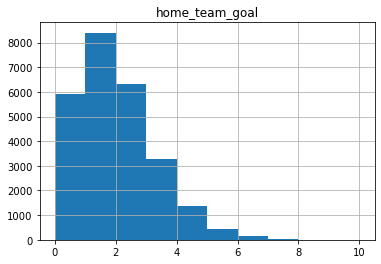

In [55]:
plt.title('home_team_goal')
match_countries_league['home_team_goal'].hist()

<AxesSubplot:title={'center':'away_team_goal'}>

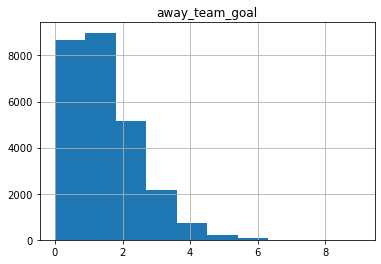

In [56]:
plt.title('away_team_goal')
match_countries_league['away_team_goal'].hist()

### Q1:- Which players had the most penalties


In [57]:
full_player.groupby('player_name')['potential'].max().sort_values(ascending=False).head(10)

player_name
Pape Kouli Diop      93.0
Pape M'Bow           93.0
Pape Modou Sougou    93.0
Pape Abdou Paye      92.0
Pape Diakhate        92.0
Pape Diamanka        92.0
Manu Molina          92.0
Pape Habib Sow       92.0
Manu Torres          92.0
Lorenzo Tonelli      91.0
Name: potential, dtype: float64

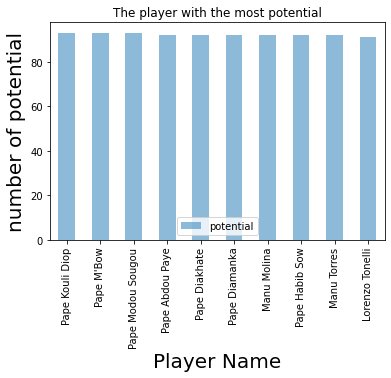

In [58]:
full_player.groupby('player_name')['potential'].max().sort_values(ascending=False).head(10).plot(kind='bar',alpha=.5)
plt.title('The player with the most potential')
plt.xlabel('Player Name' ,fontsize=20)
plt.ylabel('number of potential' ,fontsize=20)
plt.legend()

###  Question 2 :- The most preferred foot

In [59]:
#get the number of each foot
num_right=1
num_left=1
# cerate a number of preferred_foot 
for i,per in enumerate(full_player['preferred_foot']):
    if per == 'right':
        num_right+=1
    else:
        num_left+=1
print(num_right)
print(num_left)

8416
2483


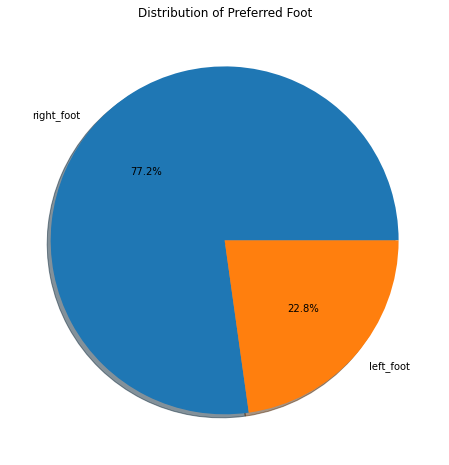

In [60]:
# pie chart for result of matches in percentage
plt.figure(figsize=(8,8));
pie_labels = ['right_foot','left_foot']
plt.pie([num_right, num_left], labels = pie_labels, autopct='%1.1f%%',shadow=True);
plt.title('Distribution of Preferred Foot');

### Q3:- what is the  relation between number of goals scored when teams are playing in their home  ground

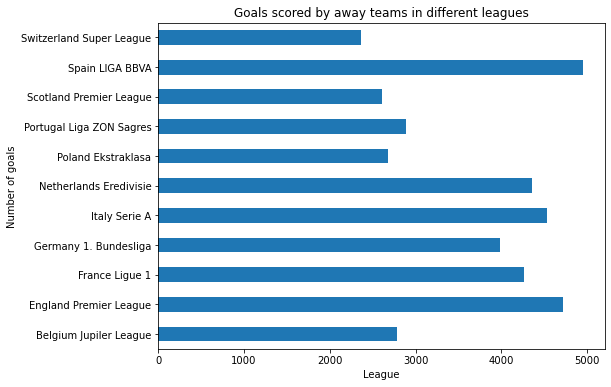

In [61]:
# goals scored in different leagues by home goal 
plt.figure(figsize=(8,6));
match_countries_league.groupby('league').home_team_goal.sum().plot(kind='barh')
plt.xlabel('League')
plt.ylabel('Number of goals')
plt.title('Goals scored by away teams in different leagues');

 ### Q4:- Which league has most number of goals scored?

In [62]:
total_goal_away=match_countries_league.groupby('league')['away_team_goal'].sum()
total_goal_home=match_countries_league.groupby('league')['home_team_goal'].sum()
total_league_goals=total_goal_away+total_goal_home
total_league_goals

league
Belgium Jupiler League      4841
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4656
Portugal Liga ZON Sagres    5201
Scotland Premier League     4804
Spain LIGA BBVA             8412
Switzerland Super League    4166
dtype: int64

Text(0.5, 1.0, 'Total Numer of goals scored per league')

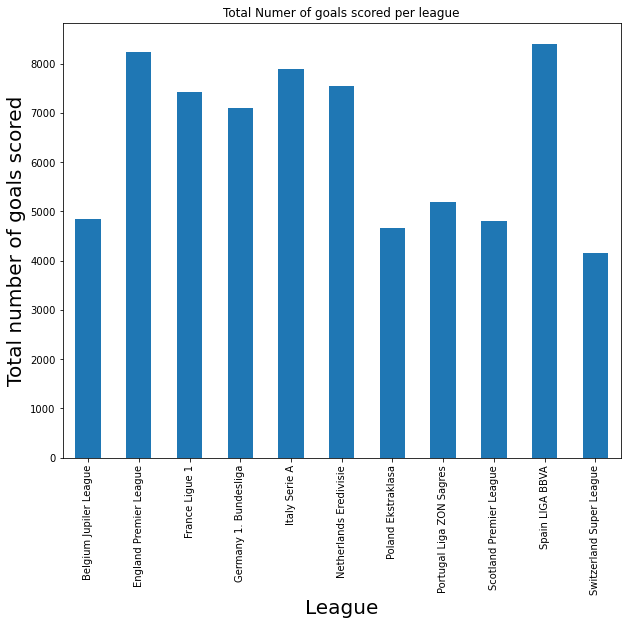

In [63]:
#total goals socred in each league
total_goal_away=match_countries_league.groupby('league')['away_team_goal'].sum()
total_goal_home=match_countries_league.groupby('league')['home_team_goal'].sum()
total_league_goals=total_goal_away+total_goal_home
total_league_goals.plot(kind='bar', figsize=(10,8))
plt.xlabel('League',fontsize=20)
plt.ylabel('Total number of goals scored',fontsize=20)
plt.title('Total Numer of goals scored per league')

# Q5:- what is the biggest matches that were played in each season ?

In [64]:
matches_season

,season,matches
0,2008/2009,3326
1,2009/2010,3230
2,2010/2011,3260
3,2011/2012,3220
4,2012/2013,3260
5,2013/2014,3032
6,2014/2015,3325
7,2015/2016,3326


Text(0.5, 1.0, 'Matches Played per season')

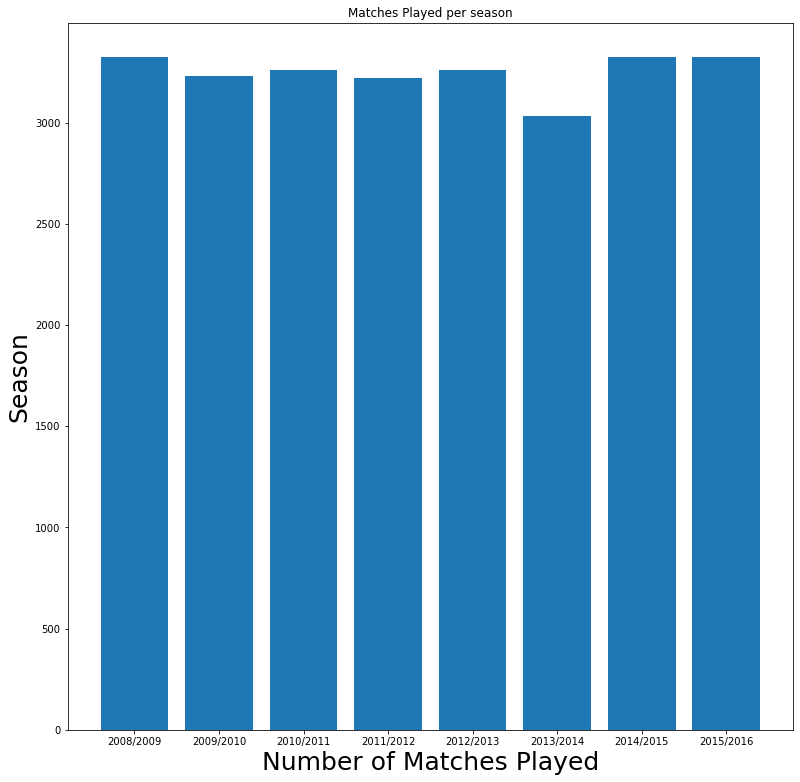

In [65]:
plt.figure(figsize=(13,13));
plt.bar(matches_season['season'], matches_season['matches'])
plt.ylabel('Season',fontsize=25)
plt.xlabel('Number of Matches Played',fontsize=25)
plt.title('Matches Played per season')

## Limitations

The number of information we had about each column was very little, and there are many columns that I did not understand their meaning, so I erased them, perhaps if there more explaining about the  meaning of each  column, I could have come up with a better result

<a id='conclusions'></a>
# Conclusions



# Q1:- Which players had the most penalties ? ###

#### 1- Manu Torres        
#### 2- Manu Molina

#  Question 2 :- what The most preferred foot ? 
#### Right Foot

# Q3:- what is the  relation between number of goals scored when teams are playing in their home  ground 

 ## it seems the teams who playing in their home ground got the most win


 # Q4:- Which league has most number of goals scored?
 
#### Spain LIGA BBVA has the maximum number of goals scored thus far which is 8412.

# Q5:- what is the biggest matches that were played in  season ?

### 2008/2009 were played about(3326) and 2015/2016 were played about(3326)

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

1